# ***Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset***

In this model we try to predict the images of Dogs and Cats . The major steps involved are :-

*   Importing the libraries and dataset
*   Splitting the dataset into Training set and Test set
*   Feature Scaling
*   Training The SVM model on training set
*   Predicting a new result for Dog and Cat
*   Predicting the test set results
*   Making the Confusion matrix
*   Visualising the Training Set Results
*   Visualising the Test Set Results











## Step 1: Uploading Kaggle Dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 376MB/s]
100% 1.06G/1.06G [00:04<00:00, 247MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [7]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

Categories = ['cats', 'dogs']
flat_data_arr = []  # input array
target_arr = []  # output array

# Specify the main directory containing both training and testing subdirectories
main_datadir = 'dogs_vs_cats/'

# Iterate through both training and testing categories
for category in Categories:
    print(f'loading... category: {category}')

    # Specify the subdirectories for training and testing
    train_or_test_dirs = ['train', 'test']

    for train_or_test in train_or_test_dirs:
        # Form the complete path
        path = os.path.join(main_datadir, train_or_test, category)

        for img in os.listdir(path)[:500]: # since there are over 25000 images we choose only the first 500 images
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (40, 40, 3))  # Adjust the size as needed
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))

        print(f'loaded {train_or_test} category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category: cats
loaded train category: cats successfully
loaded test category: cats successfully
loading... category: dogs
loaded train category: dogs successfully
loaded test category: dogs successfully


# Step 2 : Importing the Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 3 : Importing the Dataset

In [9]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape
X = df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### Step 4 : Splitting the dataset into Training Set and Test Set

In [10]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3, random_state=0)

# Step 5 : Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
#Feature Scaling allows us to put all the features on the same scale
sc = StandardScaler()
#sc is the object of class StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 6 : Training the SVM model on the Training Set

In [12]:
#SVM is about finding the best decision boundary which would help separate the space into classes
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train , y_train)

SVC(random_state=0)

# Step 7 : Predicting a new result for Dog

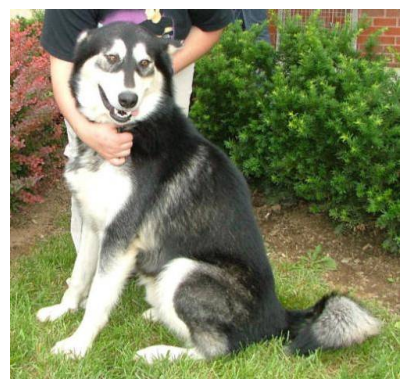

The predicted image is: dogs


In [16]:
path = 'dogs_vs_cats/test/dogs/dog.10021.jpg'
img = imread(path)

plt.imshow(img)
plt.axis('off')
plt.show()

# Resize to match training image size
img_resize = resize(img, (40, 40, 3))

# Flatten and scale
l = [img_resize.flatten()]
l = sc.transform(l)  # Apply the same scaler used in training

# Predict
pred = classifier.predict(l)[0]
print("The predicted image is:", Categories[pred])

# Step 8 : Predicting a new result for Cat

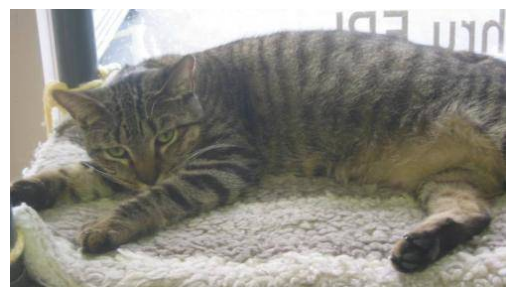

The predicted image is: cats


In [18]:
path = 'dogs_vs_cats/test/cats/cat.10017.jpg'
img = imread(path)

plt.imshow(img)
plt.axis('off')
plt.show()

# Resize to match training image size
img_resize = resize(img, (40, 40, 3))

# Flatten and scale
l = [img_resize.flatten()]
l = sc.transform(l)  # Apply the same scaler used in training

# Predict
pred = classifier.predict(l)[0]
print("The predicted image is:", Categories[pred])

# Step 9 : Predicting the Test Set results

In [15]:
# We understand that how many predictions are correct and incorrect
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [1 1]
 ...
 [0 0]
 [0 1]
 [0 0]]


# Step 10 : Making the Confusion Matrix

In [19]:
# It would tell the exact number of correct and incorrect predictions and tells the Accuracy of the Model
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test , y_pred)

[[193 115]
 [ 98 194]]


0.645

# Step 11 : Visualising the Training Set results

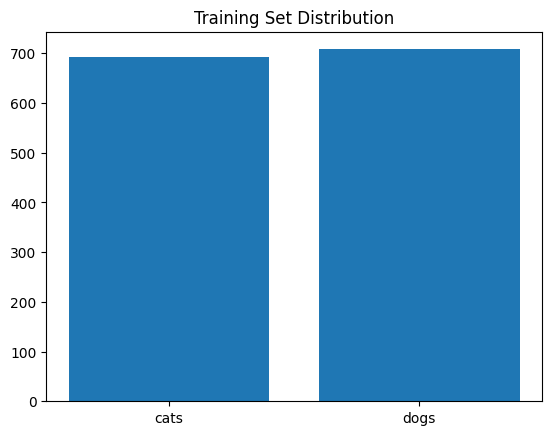

In [20]:
plt.bar(Categories, np.bincount(y_train))
#np.bincount(y_train) → counts how many training images are labeled as 0 (cats) and 1 (dogs).
#The heights of the bars represent the number of images per category in your training set.
plt.title("Training Set Distribution")
plt.show()

# Step 12 : Visualising the Test Set Results

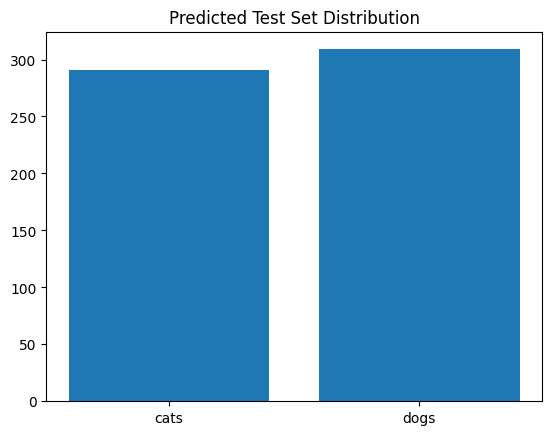

In [21]:
plt.bar(Categories, np.bincount(y_pred))
plt.title("Predicted Test Set Distribution")
plt.show()